# Taller 3

## Métodos Computacionales 1 2022-10

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ApellidoNombre_Taller3.ipynb. **El archivo debe poder correr en el binder de la magistral** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los casos de prueba, puede correr los casos de prueba pero no modificarlos.

**Entrega: Viernes 11 de Marzo 11:59 pm**

# -----------------------------------------------------------------------------

## Problema 1

a ) Implemente el método de interpolación de Lagrange que ajuste un polinomio de grado 10 a los siguientes datos experimentales.



```
    x_values = 0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200
    y_values = 0.0, 0.0, 0.0, 0.01, 0.16, 0.91, 1.93, 1.51, 0.43, 0.05, 0.0
```

El código debe generar una figura que contenga los puntos asociados a los datos experimentales y la curva del polinomio de Lagrange.

b) Obtenga los coeficientes del polinomio interpolador anterior guardelos en la variable `coeffs`. Es decir escriba el polinomio interpolador como, 

$$ f(x) = \sum_{i=0}^{10}a_ix^i$$

Para verificar su resultado debe gráficar el polinomio a partir de los coeficientes junto con los puntos experimentales.



In [1]:
import Algoritmosnumericos as Alg
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import lagrange
plt.style.use('dark_background')
%matplotlib widget
%config InlineBackend.figure_format = 'retina'

# Solución problema 1

Text(0.5, 1.0, 'Interpolación de Lagrange')

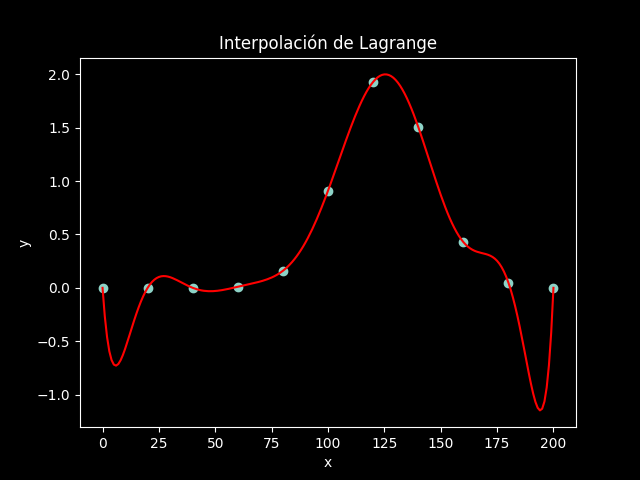

In [2]:
x_values = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
y_values = [0.0, 0.0, 0.0, 0.01, 0.16, 0.91, 1.93, 1.51, 0.43, 0.05, 0.0]
x = np.arange(0, 201, 1)
y = Alg.interpolacionlagrange(x, x_values, y_values)
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x, y, color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interpolación de Lagrange')

In [3]:
# Coeficients
# Por favor que x tenga igual numeros de puntos que y
def coeficientesinterpolacionlagrange(x, y):
    a = lagrange(x, y)
    b = []
    for i in a:
        b.append(i)
    print('Los coeficientes de lagrange(ordenados desde el mayor grado)')
    print(' ')
    return b


print(coeficientesinterpolacionlagrange(x_values, y_values))

Los coeficientes de lagrange(ordenados desde el mayor grado)
 
[1.2387337928516307e-18, -1.2022687854800468e-15, 4.960188285383598e-13, -1.1357299158812817e-10, 1.582076370804397e-08, -1.3836045102719882e-06, 7.560958977485662e-05, -0.002473499552193564, 0.043505564980158784, -0.30817400793650745, 0.0]


# -----------------------------------------------------------------------------

## Problema 2

Una forma de generalizar el método de integración del trapecio para una integral doble de una función $f(x, y)$ consiste en dividir el plano xy en una grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado pequeño de la grilla, ver imagen.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image6.png)

Calcule numéricamente el volumen de una semiesfera de radio 1 (domo) centrada en el origen del plano xyz, realizando lo siguiente: 



*   Cree una grilla entre -1 y 1 en el plano xy, donde el número de cuadrados en cada lado de la grilla sea $n$. Es decir la grilla tendría $n+1$ puntos en cada eje, y $n^2$ cuadrados pequeños.
*   Para cada cuadrado pequeño calcule el promedio la función en los cuatro vértices y multiplique por el área del cuadrado pequeño. Si el punto queda fuera de la esfera asuma que el valor de la función $f(x, y)$ es cero.
*  Calcule la integral del volumen de la semiesfera de radio 1.

Cree la función `volume_semisphere(n)` que recibe `int` `n` el número de cuadrados por cada lado de la grilla del plano xy, y retorna un `float` con el volumen de la semiesfera de radio 1.

Al final incluya los siguientes `prints` para la evaluación de su ejercicio:


```
print(f"Volume semisphere with n = 2: {volume_semisphere(2)}")
print(f"Volume semisphere with n = 3: {volume_semisphere(3)}")
print(f"Volume semisphere with n = 10: {volume_semisphere(10)}")
print(f"Volume semisphere with n = 100: {volume_semisphere(100)}")
```




# Solución problema 2

La ecuación del domo es:

$$f(x,y)=\sqrt{1-x^{2}-y^{2}}$$


In [4]:
def domo(x, y):
    return np.sqrt(x**2+y**2)


def volume_semisphere(n):
    l = 2/n
    A0 = l**2
    V = 0
    for y in np.arange(0, 1+l, l):
        for x in np.arange(0, 1+l, l):
            # El ciclo a continuación nos permite hallar una cuarta parte
            #del volumen
            z1 = 0
            z2 = 0
            z3 = 0
            z4 = 0
            if x**2+y**2 <= 1:
                z1 = domo(x, y)
            if (x+l)**2+y**2 <= 1:
                z2 = domo(x+l, y)
            if x**2+(y+l)**2 <= 1:
                z3 = domo(x, y+l)
            if (x+l)**2+(y+l)**2 <= 1:
                z4 = domo(x+l, y+l)
            midz = (z1+z2+z3+z4)/4
            V += A0*midz
    return 4*V


print('El valor real del el domo es:')
print((4/6)*np.pi)
print('------------------')
print('Numericamente:')
print(f"Volume semisphere with n = 2: {volume_semisphere(2)}")
print(f"Volume semisphere with n = 3: {volume_semisphere(3)}")
print(f"Volume semisphere with n = 10: {volume_semisphere(10)}")
print(f"Volume semisphere with n = 100: {volume_semisphere(100)}")

El valor real del el domo es:
2.0943951023931953
------------------
Numericamente:
Volume semisphere with n = 2: 4.0
Volume semisphere with n = 3: 2.8612901479977424
Volume semisphere with n = 10: 1.8778738675755966
Volume semisphere with n = 100: 2.0892099447162398


# -----------------------------------------------------------------------------

## Problema 3

Considere la integral, 

$$ I = \int_0^1\sin^2(\sqrt{100x})\,dx$$

Cree la función `gauss_integrate(n)`, que reciba el grado `n` del polinomio de Gauss-Legendre y retorne la integral de la función pedida con el método de gauss-legendre.

Verifique sus resultados obtenidos usando la libreria `scipy.integrate`. Imprima los resultados obtenidos con la libreria.

# Solución problema 3

El siguiente programa y las formúlas utilizadas, se basan en las notas dadas en clase:

In [5]:
from scipy.special import roots_legendre, eval_legendre


def funcion(x):
    return (np.sin((100*x)**(1/2)))**2


def gauss_integrate(n, a, b):
    x, integral = 0, 0
    raices, pesos = roots_legendre(n)
    for i in range(0, n):
        x = (1/2)*(raices[i]*(b-a)+a+b)
        integral += funcion(x)*pesos[i]
    integral = (1/2)*(b-a)*integral
    return integral

Resultados propios

In [6]:
print(gauss_integrate(1, 0, 1))
print(gauss_integrate(2, 0, 1))
print(gauss_integrate(3, 0, 1))
print(gauss_integrate(4, 0, 1))
print(gauss_integrate(20, 0, 1))
print(gauss_integrate(100, 0, 1))

0.5024843310662972
0.6273262731105194
0.23603692720508793
0.42670930479562463
0.4558325323090854
0.45583253230908444


In [7]:
Alg.intregral_gauss_legendre(funcion, 0, 1)

0.4558325323091389

Resultados libreria sympy

In [8]:
from sympy import integrate
from sympy import *
x = symbols('x')
f = (sin((100*x)**(1/2)))**2
print(integrate(f, (x, 0, 1)))

0.455832532309085


Como podemos apreciar, nuestros resultados son correctos